# Multiple Linear Regression

### Understanding Linear Regression:
It is a statisical model used to predict the relationship between independent variables and dependent variables. 

- `Examine two factors`:
    1. Which variables in particular are significant predictors of outcome variables.
    2. How significant is the regression line is to make predictions with Highest possible accuracy.


- `Regression Equation`: Simple linear regression equation with one dependent and another independent variable is represented by `y=mx+c`. 
    - where, `y= dependent variable`
    - `x= independent variable`
    - `m=Slope of line`
    - `m=(y2-y1)/(x2-x1)`
    - `c= coefficient of line`


Actual y values and predicted y values, the distance between actual and predicted values are known as residuals or errors. The best fit should have least sum of squares of these errors also known as e-square.

- `Finding the best fit line:`
    - Minimizing the distance: there are lot of ways to minimize the distance between the line and data points like sum of squared errors, sum of absolute errors and Root mean square etc. 

---

- `Multiple Linear Regression`:
It models a numeric outcome Y as a straight line combination of several `inputs x1,x2,....xn`.  Simply y=m1x1+m2x2+m3x3+.....mnxn+c, where y is dependent variable and m1,m2,m3.. are slopes and c is coefficient. The standard equation is Y=B0+B1X1......BnXn+epsilon, where epsilon is the "error" or noise. B0= The intercept (Y where all X`s are 0). Bi= coefficient showing how much Y changes per unit increase in Xi, holding other constant. 

### What is being predicted with what:
-  Choose a single continious target (eg.. body_mass_g). Multiple regression predicts that target using two or more predictors. (for example: "bill_length_mm, bill_depth_mm,species). 
- Categorical predictors like species are represented as `Dummy variables` (0/1) indicators in the model so the equation still stays linear in the parameters. 
---

#### How to read a coefficient: 
1. `Sign` : Positive coefficient means "more of this predictor, higher predicted Y (all else equal); negative means oposite.
2.  `Magnitude and units`: A coefficient of 15 on flipper_length_mm means “each extra mm of flipper length adds about 15 grams to predicted body mass,” if body mass is the target and other predictors are held fixed.

3. Fit= "best line" and loss
    - The model chooses coefficients that minimize the overall squared error between predictions and actual values (ordinary least squares).
    - This “least squares” view is enough to understand why there is a single “best” set of coefficients: it’s the one that makes the total squared mistakes as small as possible.

4. Model quality:
    - R squared:  The fraction of variability in Y that the model explains. Values closer to 1 mean predictions follow the data more closely, but high R- squared does not guarantee a good model if assumptions are broken or overfit.
    - Residuals: Residual = actual − predicted. Plotting residuals versus predicted values should show points scattered roughly randomly around zero, not a clear pattern. This is the fastest visual check that linear approximation is reasonable.


----

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

penguins=pd.read_csv("..\\Datasets\\penguins.csv")

penguins=penguins.dropna()
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [29]:
# One hot encoding: Every category gets it own place. Categorical data into numerical form, instead of single number it creates single binary column (1 or 0) for each category. 
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,drop="first")  #Drops first to avoid multicollinearity
categorical=encoder.fit_transform(penguins[["species","sex"]])
cat_columns=encoder.get_feature_names_out(["species","sex"])
cat_penguins=pd.DataFrame(categorical, columns=cat_columns, index=penguins.index)

In [ ]:
from sklearn.model_selection import train_test_split

numerical=penguins[["bill_length_mm","bill_depth_mm","flipper_length_mm"]]
X=pd.concat([numerical,cat_penguins],axis=1) #Predictors
y=penguins["body_mass_g"] #Target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
mse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(mse)
print(r2)

275.7585558550137
0.8728104646871532


In [39]:
# New penguin measurements (must match your 8 columns exactly!)
new_penguin = pd.DataFrame({
    'bill_length_mm': [48.5],      # Bill length
    'bill_depth_mm': [18.2],       # Bill depth  
    'flipper_length_mm': [195],    # Flipper length
    'species_Chinstrap': [0],      # 0=No, 1=Yes (Adelie=reference)
    'species_Gentoo': [1],         # 0=No, 1=Yes
    'sex_male': [1]                # 0=Female, 1=Male
}, index=[0])
predicted_weight = model.predict(new_penguin)[0]
print(f"Predicted body mass: {predicted_weight:.0f}g ± 276g")
print(f"Range: {predicted_weight-276:.0f}g to {predicted_weight+276:.0f}g")


Predicted body mass: 5191g ± 276g
Range: 4915g to 5467g


- Mean Squared Error (MSE): The average of the squared errors. For each penguin in the test set, calculate error = actual mass − predicted mass. Lower MSE = better model.
- R-squared — The “percentage of explanation” score. 0 = model explains nothing (as good as guessing the average). 1 = my model predicts perfectly (zero error). Negative =  model is worse than guessing the average. 

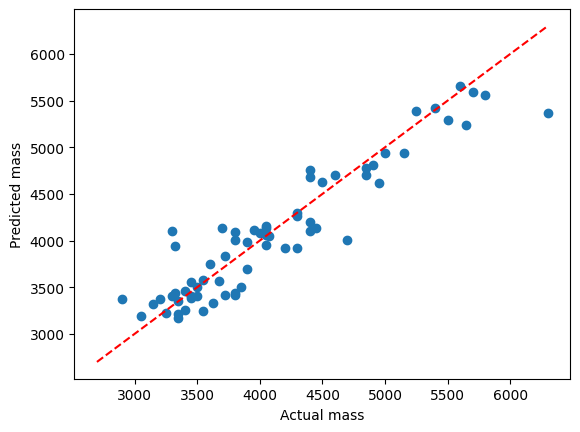

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual mass")
plt.ylabel("Predicted mass")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  
plt.show()